In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del sistema
padron = 109932
m = padron / 200
k = 25000
l_inicial = 0
c_inicial = 0.1
t_final = 5
h = 0.005

In [ ]:
# Solución analítica de la ecuación diferencial
def sol_analitica(t):
	return 0.1 - 0.1 * np.cos(((k/m)**0.5)*t)

def f_sin_amortiguar(y, v):
	return ((k/m) * (c_inicial - y))

# Para el caso de beta = 1 aplico el método de Euler implícito

# Defino la inversa de la matriz A y el término independiente para tener un sistema de tipo: Ax = b (termino_indep es b)

# Matriz inversa para la solución sin amortiguación
beta = 0.5
l = l_inicial
cp = 0 # c' (como el sistema no tiene amortiguación c' = 0)

divisor = (m + (h**2) * k * (beta**2) + (h * beta * l))
A_inversa = np.array([[((m+(h*beta*l))/divisor) , ((h*m*beta)/divisor)], 
                        [(((-h*k*beta))/divisor) , (m/divisor)]])

termino_indep = np.array([0 , (h * beta) * (k * (c_inicial/m) + l * (cp/m))])

# Vector de tiempo
t = np.arange(0, t_final+h, h)

In [25]:
def euler_implicito(A_inversa, termino_indep, t):
        # número de pasos en 5 segundos
	cantidad = len(t)
	
	# Inicialización de variables
	u = np.zeros((2, cantidad))

        # Bucle para resolver sistema
	for n in range(cantidad - 1):
		aux = A_inversa @ u[:,n] + termino_indep
		print("solucion actual:", u[:, n])
		u[:,(n+1)] = aux

	
	print("soluciones:", u[0])
	return u[0], t

In [ ]:
def ponderado_implicito(beta, h, f, A_inversa, termino_indep, t):
        # número de pasos en 5 segundos
	cantidad = len(t)
	
	# Inicialización de variables
	u = np.zeros((2, cantidad))

        # Bucle para resolver sistema
	for n in range(cantidad - 1):
		termino_indep = np.array([h * ((1 - beta) * u[1][n]), 
			     (h * beta) * (k * (c_inicial/m) +  0 * (0/m)) + h * (1 - beta) * f(u[0][n], u[1][n])])
                
		aux = A_inversa @ u[:,n] + termino_indep
		print(f"solucion actual: {u[:, n]}")
		u[:,(n+1)] = aux

	
	print(f"soluciones:u = {u[0]} \n v = {u[1]}")
	return u[0], t

solucion actual: [0. 0.]
solucion actual: [0.         0.02274133]
solucion actual: [0.00011358 0.04545683]
solucion actual: [0.00034047 0.06812074]
solucion actual: [0.0006803  0.09070736]
solucion actual: [0.00113255 0.11319113]
solucion actual: [0.00169658 0.13554664]
solucion actual: [0.00237162 0.15774863]
solucion actual: [0.00315677 0.17977207]
solucion actual: [0.00405102 0.20159214]
solucion actual: [0.00505324 0.2231843 ]
solucion actual: [0.00616215 0.24452428]
solucion actual: [0.00737639 0.26558812]
solucion actual: [0.00869444 0.28635222]
solucion actual: [0.0101147  0.30679333]
solucion actual: [0.01163544 0.32688861]
solucion actual: [0.01325481 0.34661562]
solucion actual: [0.01497087 0.36595237]
solucion actual: [0.01678155 0.38487736]
solucion actual: [0.01868469 0.40336954]
solucion actual: [0.02067802 0.42140842]
solucion actual: [0.02275919 0.43897401]
solucion actual: [0.02492571 0.4560469 ]
solucion actual: [0.02717505 0.47260826]
solucion actual: [0.02950454 0.4

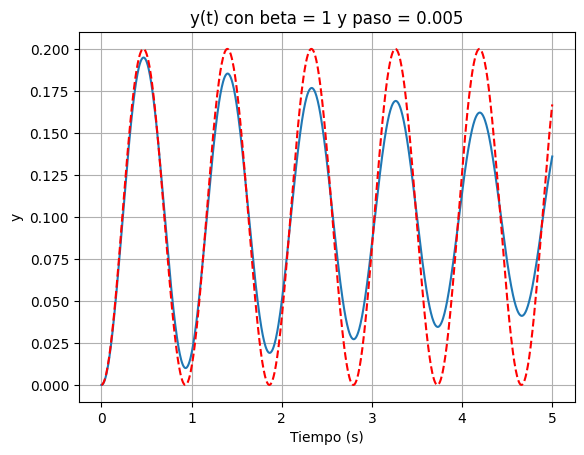

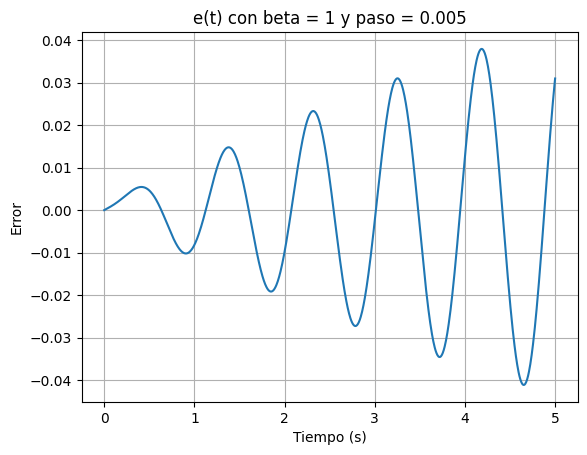

In [ ]:
# Llamo al euler implícito
# u, t = euler_implicito(A_inversa, termino_indep, t)

# Llamo al ponderado implícito
u, t = ponderado_implicito(0.5, h, A_inversa, termino_indep, t)

# Grafico la solución numérica obtenidad junto con la solución analítica
ax: plt.Axes
fig, ax = plt.subplots()
ax.plot(t, u, label='aproximación')
ax.plot(t, sol_analitica(t), 'r--', label='solucion analítica')
ax.set_title(f'y(t) con beta = {beta} y paso = {h}')
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('y')
ax.grid(True)
plt.show()

# Grafico el error de truncamiento entre la aproximación y la solución anlítica
paso = 0
aproximacion = np.copy(u)
for i in range(len(t)):
	aproximacion[i] = (sol_analitica(paso) - aproximacion[i])
	paso += h
ax: plt.Axes
fig, ax = plt.subplots()
ax.plot(t, aproximacion)
ax.set_title(f'e(t) con beta = {beta} y paso = {h}')
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Error')
ax.grid(True)
plt.show()